#  Breast cancer prediction model

#### A classifier problem to identify cancerous growth as malignant (can spread) or benign (doesn't spread, can be removed safely) based on its features identified from images.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### Dataset:-

Dataset consists of diagnosis data of breast cancer with features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Columns are:- 1) ID number, 2) Diagnosis (M = malignant, B = benign), 3) radius, 4) texture, 5) perimeter, 6) area 7) smoothness, 8) compactness, 9) concavity 10) concave points 11) symmetry 12) fractal dimension. Std deviation and largest value of features 2-12 are included in columns 13-32.

Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

This data is also available in sklearn.datasets

#### Load data, explore, and clean-up

In [2]:
df=pd.read_csv('cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Drop the id column as it is not relevant to diagnosis. We can also drop columns 13-32 as they contain the std deviation and largest values of features, which are not likely to correlate with the diagnosis much.
Also, replace the values in diagnosis column to numerical values: M=1, B=0.

In [4]:
df.drop(df.columns[[i for i in range (12,33)]], axis=1, inplace=True)

In [5]:
df.drop(labels='id',axis=1, inplace=True)

In [6]:
df['diagnosis'].replace(['M','B'],[1, 0], inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [8]:
df.dtypes

diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [9]:
df.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

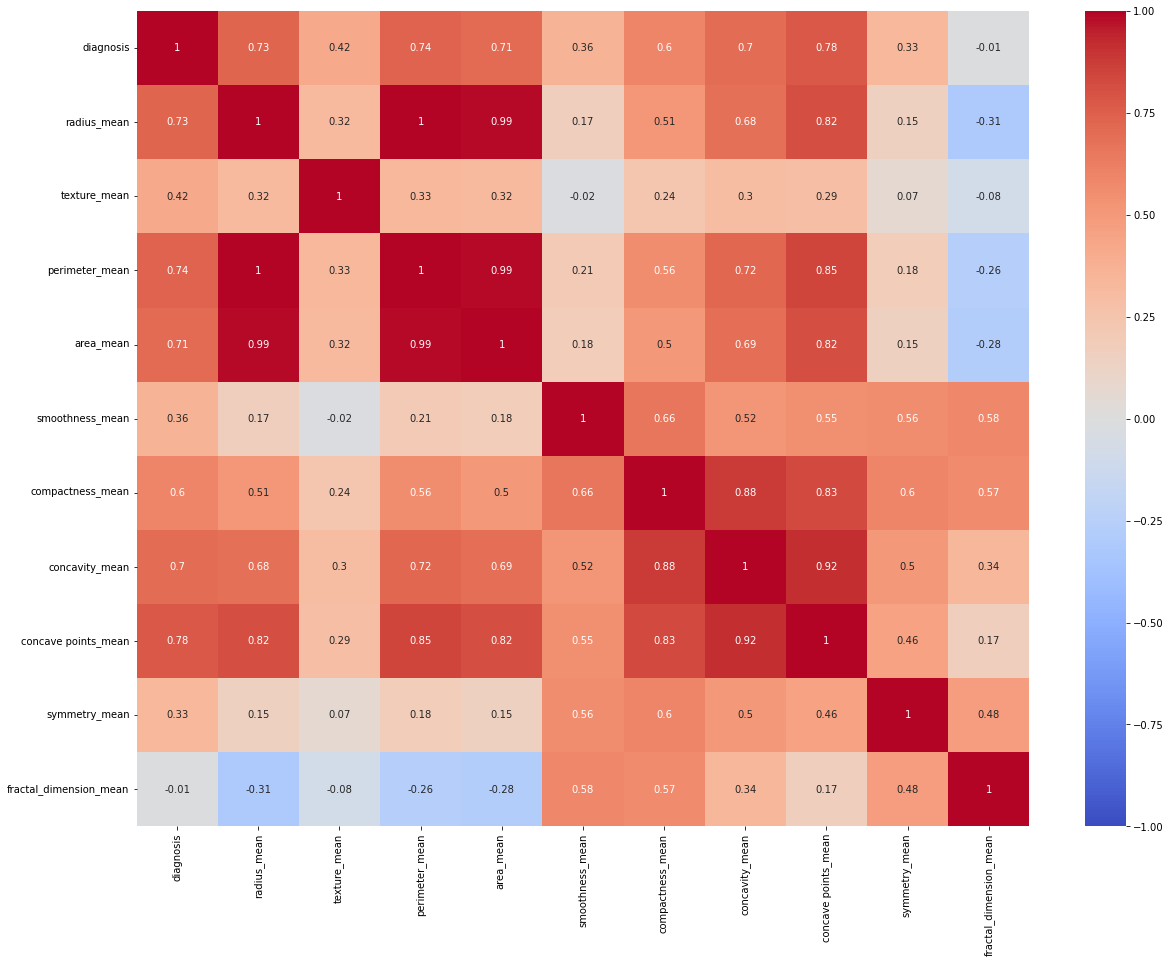

In [10]:
corr_mat=df.corr()
corr_mat=np.around(corr_mat,decimals=2)
fig=plt.figure(figsize=(20, 15))
sn.heatmap(corr_mat, annot=True, fmt='g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

From the correlation matrix, there's pretty good correlations of features with diagnosis column, which is good for ML models.

#### Prepare data for machine learning

Split into X (features), and Y (target). Split into train and test sets and feature scaling using Standardisation.

In [11]:
Y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)

In [12]:
print(Y.shape, X.shape)

(569,) (569, 10)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,StandardScaler

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape,X_test.shape)

(455, 10) (114, 10)


In [15]:
Scal=StandardScaler()
X_train_std=Scal.fit_transform(X_train)
X_test_std=Scal.transform(X_test)

#### Metrics and Confusion Matrix

To be used later to judge the perfomance of models

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [17]:
def scores():
    print('Acc. Score: ', accuracy_score(Y_test,Y_pred))
    print('F1 Score: ', f1_score(Y_test,Y_pred))
    print('Precision: ', precision_score(Y_test,Y_pred))
    print('Recall: ', recall_score(Y_test,Y_pred))  

In [18]:
def confus_mat():
    LABELS = ['Benign', 'Malignant']
    conf_mat = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sn.heatmap(conf_mat, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cbar=False, cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [19]:
def var():
    print('Train accuracy: ', accuracy_score(Y_train,Y_pred_train))
    print('Test accuracy: ', accuracy_score(Y_test,Y_pred))

In [20]:
def metrics():
    scores()
    confus_mat()
    var()

### kNN Classifier

First, we will use the k-Nearest Neigbour classifier, which decides the target variable by comparing the feature set to it's nearest neighbours in hyperspace. As this is based on the distances between points in the hyperspace, we will use the standard scaled data to avoid biases to features depending on their high or low numerical values.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

Acc. Score:  0.9298245614035088
F1 Score:  0.9047619047619048
Precision:  0.95
Recall:  0.8636363636363636


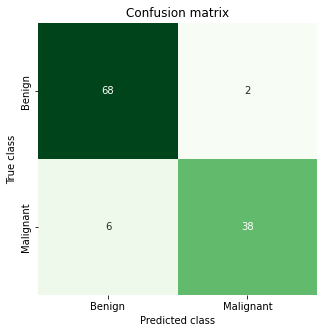

Train accuracy:  0.9648351648351648
Test accuracy:  0.9298245614035088


In [22]:
kNN=KNeighborsClassifier()
kNN.fit(X_train_std,Y_train)
Y_pred=kNN.predict(X_test_std)
Y_pred_train=kNN.predict(X_train_std)
metrics()

We get an accuracy of 93 %, which is a good sign. The train accuracy is higher than test accuracy, which means we might be overfitting the train data a bit.
We can try and improve the accuracy and reduce variance by tuning the hyper parameters. Setting n_neighbors (k) value for kNN is important. General rule of thumb is to use odd values if the target value is binary to avoid ties. Another general guideline is to use sqrt(N), where N is the total number of samples.
I found in my testing that the accuracy score varied for a particular n, the accuracy scores varied greatly depending on the test and train data. Therefore, to avoid overfitting and to get a more general idea, I decided to do an average of fits for 100 runs with different test-train sets for k's from 1 to 49 (odd values only).

In [23]:
def knn_fn(k,Xtrain,Ytrain):
    kNN=KNeighborsClassifier(n_neighbors=k)
    kNN.fit(Xtrain,Ytrain)
    return kNN

Maximum Average Accuracy ( 94.0  %) for k =  17


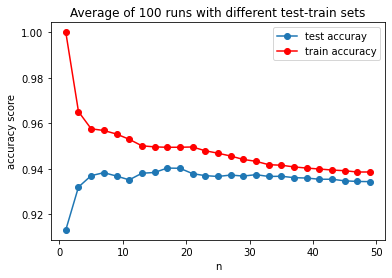

In [28]:
ns=100
K=[i for i in range(1,50,2)]
Acc=np.zeros(len(K))
Acc_train=np.zeros(len(K))
for i in range(0,ns):
    for i in range(len(K)):
        kNN=knn_fn(K[i],X_train_std,Y_train)
        Y_pred=kNN.predict(X_test_std)
        Y_pred_train=kNN.predict(X_train_std)
        Acc[i]+=(accuracy_score(Y_test,Y_pred))
        Acc_train[i]+=(accuracy_score(Y_train,Y_pred_train))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    X_train_std=Scal.fit_transform(X_train)
    X_test_std=Scal.transform(X_test)
plt.plot(K,Acc/ns,marker='o',label='test accuray')
plt.plot(K,Acc_train/ns,'r',marker='o',label='train accuracy')
plt.legend()
plt.xlabel('n')
plt.ylabel('accuracy score')
plt.title('Average of 100 runs with different test-train sets')
print('Maximum Average Accuracy (',np.round(np.max(Acc)/ns*100),' %) for k = ',K[np.argmax(Acc)])

Maximum average accuracy is obtained for k=17. This is close to the sqrt(N) general rule. It also varies slightly from run to run. Let's see how this performs.

Acc. Score:  0.9473684210526315
F1 Score:  0.9210526315789475
Precision:  0.9459459459459459
Recall:  0.8974358974358975


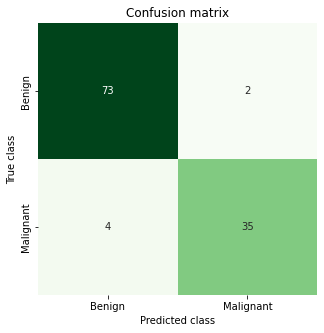

Train accuracy:  0.9472527472527472
Test accuracy:  0.9473684210526315


In [31]:
kNN=KNeighborsClassifier(n_neighbors=17)
kNN.fit(X_train_std,Y_train)
Y_pred=kNN.predict(X_test_std)
Y_pred_train=kNN.predict(X_train_std)
metrics()

The test accuracy has increased to 95% from the previous 93% and the variance has reduced too.
The recall has increased too, which means the no of false negatives has decreased as seen from the confusion matrix. Low number of false negatives is desirable in this particular case, because we donot wan't to misdiagnose a malignant cancer as a benign one, which will have a significant impact on the patient's future.

### Decision Tree

Next, we will use decision tree model, which splits the data based on the concept of impurities or entropy and create a decision tree to predict the target variable. As this is not sensitive to whether features are scaled or not, we will use the original data without scaling. 

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Acc. Score:  0.9473684210526315
F1 Score:  0.9230769230769231
Precision:  0.9230769230769231
Recall:  0.9230769230769231


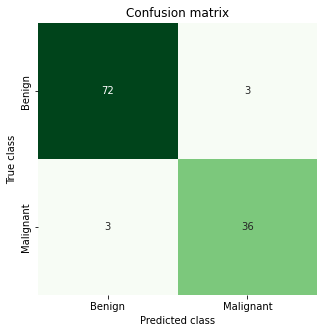

Train accuracy:  1.0
Test accuracy:  0.9473684210526315


In [42]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_pred=dtree.predict(X_test)
Y_pred_train=dtree.predict(X_train)
metrics()

Although decision tree gives a good result (95%) in terms of test accuracy, we can see from the train accuracy that it is overfitting the data. Therefore, we need to tune the hyperparameters or prune the tree to avoid this issue. Let's first visualize the tree.

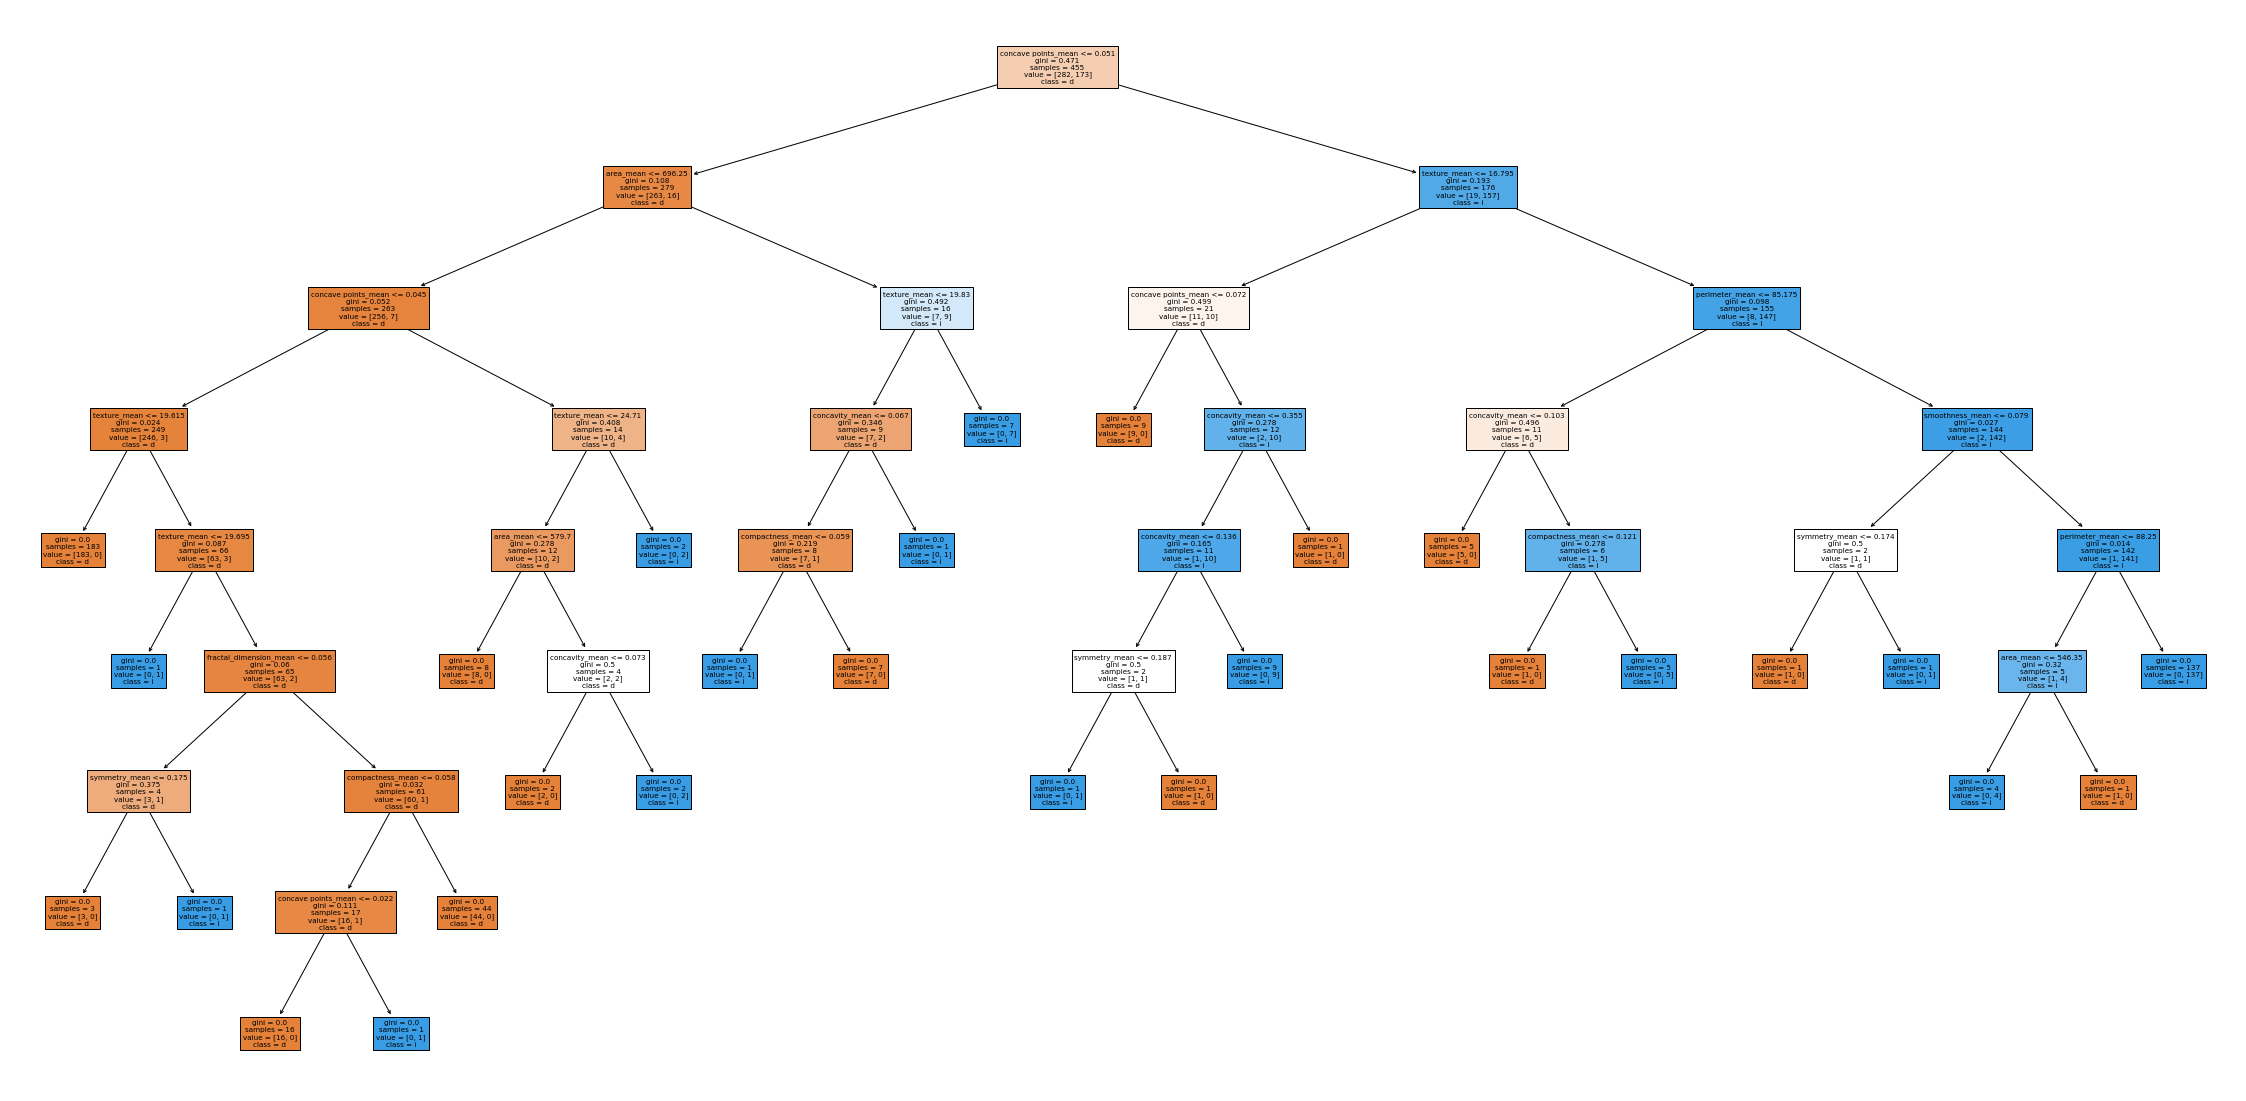

In [43]:
fig=plt.figure(figsize=(40,20))
_ = tree.plot_tree(dtree, 
                   feature_names=list(X),  
                   class_names='diagnosis',
                   filled=True)

It looks like the depth of the tree is too much and is contributing to the overfitting problem. From the figure, it looks like we can reduce the depth to 4 to have to have all parameters addressed and get good accuracy.

Acc. Score:  0.956140350877193
F1 Score:  0.935064935064935
Precision:  0.9473684210526315
Recall:  0.9230769230769231


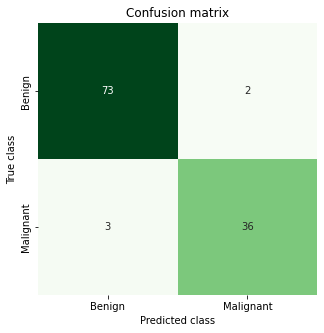

Train accuracy:  0.978021978021978
Test accuracy:  0.956140350877193


In [47]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,Y_train)
Y_pred=dtree.predict(X_test)
Y_pred_train=dtree.predict(X_train)
metrics()

That worked well. The overfitting has reduced and it even increased the accuracy of our prediction for test data from 95% to 96%. To reduce the variance further, we can try grid_search to optimize another hyper-parameter.

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params =  {'min_samples_leaf': [i for i in range(1,20)]}
grid = GridSearchCV(estimator=dtree, param_grid=params, n_jobs=-1)
grid.fit(X_train,Y_train)
grid.best_params_

{'min_samples_leaf': 5}

Acc. Score:  0.9473684210526315
F1 Score:  0.9210526315789475
Precision:  0.9459459459459459
Recall:  0.8974358974358975


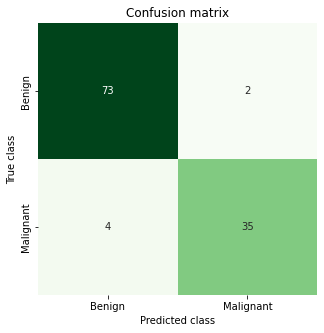

Train accuracy:  0.9692307692307692
Test accuracy:  0.9473684210526315


In [50]:
dtree=DecisionTreeClassifier(max_depth=4,min_samples_leaf=5)
dtree.fit(X_train,Y_train)
Y_pred=dtree.predict(X_test)
Y_pred_train=dtree.predict(X_train)
metrics()

Although that didn't increase the test accuracy, it did decrease the variance a considerable bit. There are other hyperparameters that we can try to optimize, but let's do a random forest classifier to see if that makes an improvement.

#### Random Forest Classifier

Random forest uses multiple decision trees on various subsets of the data and averages to improve the accuracy.

In [51]:
from sklearn.ensemble import RandomForestClassifier

Acc. Score:  0.956140350877193
F1 Score:  0.935064935064935
Precision:  0.9473684210526315
Recall:  0.9230769230769231


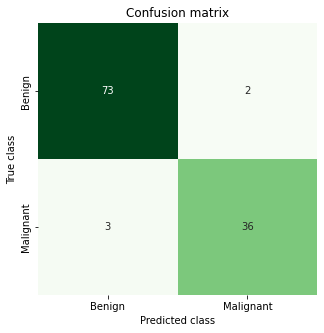

Train accuracy:  1.0
Test accuracy:  0.956140350877193


In [52]:
ranfor=RandomForestClassifier()
ranfor.fit(X_train,Y_train)
Y_pred=ranfor.predict(X_test)
Y_pred_train=ranfor.predict(X_train)
metrics()

The test accuracy has improved from decision tree model to 96%. But, from the train accuracy, we see that it overfits the train data too. Let's try to limit the depth as before.

Acc. Score:  0.9385964912280702
F1 Score:  0.9090909090909091
Precision:  0.9210526315789473
Recall:  0.8974358974358975


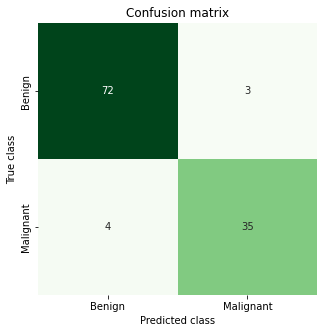

Train accuracy:  0.978021978021978
Test accuracy:  0.9385964912280702


In [53]:
ranfor=RandomForestClassifier(max_depth=4)
ranfor.fit(X_train,Y_train)
Y_pred=ranfor.predict(X_test)
Y_pred_train=ranfor.predict(X_train)
metrics()

Even though the variance is improved, the test accuracy has suffered. This is not better than the perfomance of our single decision tree model.

### Logistic Regression

Logistic regression is the most used model in binary classifications. It calculates the probability of feature set to be in one class or the other and uses it to seperate the hyperspace by a decision boundary.

In [54]:
from sklearn.linear_model import LogisticRegression

Acc. Score:  0.9210526315789473
F1 Score:  0.8799999999999999
Precision:  0.9166666666666666
Recall:  0.8461538461538461


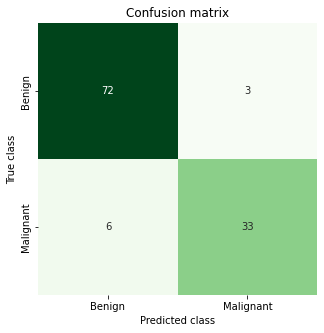

Train accuracy:  0.9538461538461539
Test accuracy:  0.9210526315789473


In [62]:
logi=LogisticRegression()
logi.fit(X_train_std,Y_train)
Y_pred=logi.predict(X_test_std)
Y_pred_train=logi.predict(X_train_std)
metrics()

Logistic regressionis not as good as kNN or decision tree.

### SVM Classifier

Support Vector Machine algorithm works by mapping the feature set to higher dimension and try to seperate it using a decision boundary. This works well if the data is linearly unseperable.

In [59]:
from sklearn import svm

Acc. Score:  0.956140350877193
F1 Score:  0.9315068493150686
Precision:  1.0
Recall:  0.8717948717948718


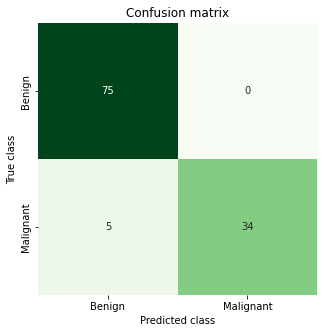

Train accuracy:  0.9582417582417583
Test accuracy:  0.956140350877193


In [63]:
svmclf=svm.SVC(kernel='rbf')
svmclf.fit(X_train_std,Y_train)
Y_pred=svmclf.predict(X_test_std)
Y_pred_train=svmclf.predict(X_train_std)
metrics()

It gives an accuracy of 96%, which is good. The variance is quite low too, which means we're not overfitting the data. The precision is 1, which means there are no false positives.

### Summary

In [64]:
sumd={'Classifier':['kNN','Decision Tree','Logistic Regression','SVM SVC'],
     'Accuracy': ['95 %','96 %','92 %','96 %'],
     'False Positives': [2,2,3,0],
     'False Negatives': [4,3,6,5],}
sum_df=pd.DataFrame(sumd)
sum_df

,Classifier,Accuracy,False Positives,False Negatives
0,kNN,95 %,2,4
1,Decision Tree,96 %,2,3
2,Logistic Regression,92 %,3,6
3,SVM SVC,96 %,0,5


## Conclusions

Both decision tree and SVM gave the best accuracy of 96 %, kNN model came close with an accuracy of 95, while logistic regression performed the worst with 92 %. Decision tree model also gave the lowest number of false negatives, which is desirable in this case as we donot wan't to misdiagnose any patients with malignant cancer as benign. Therefore, we can conclude that decision tree model is the best predictor in this case.

To increase the accuracy further, more data is required as we saw hyperparameter tuning has limited effect in the perfomance of various models.